In [1]:
import plotly.express as px
import numpy as np
import pandas as pd

In [2]:
# 한글깨짐 방지
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


DATA SET: 지역별기간별 교통량 데이터.csv

#7월 머드축제 기간에는 대천IC의 통행량이 많을까?
# 2016년 머드축제 7월 15일~7월 24일

In [3]:
df =pd.read_csv('/content/지역별기간별 교통량 데이터.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126191 entries, 0 to 126190
Data columns (total 19 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   도로_시작위치  126191 non-null  object
 1   도로_종료위치  126191 non-null  object
 2   년        126191 non-null  int64 
 3   월        126191 non-null  int64 
 4   일        126191 non-null  int64 
 5   방향       126191 non-null  int64 
 6   일종_차량수   126191 non-null  int64 
 7   이종_차량수   126191 non-null  int64 
 8   삼종_차량수   126191 non-null  int64 
 9   사종_차량수   126191 non-null  int64 
 10  오종_차량수   126191 non-null  int64 
 11  육종_차량수   126191 non-null  int64 
 12  칠종_차량수   126191 non-null  int64 
 13  팔종_차량수   126191 non-null  int64 
 14  구종_차량수   126191 non-null  int64 
 15  십종_차량수   126191 non-null  int64 
 16  십일종_차량수  126191 non-null  int64 
 17  십이종_차량수  126191 non-null  int64 
 18  전체_차량수   126191 non-null  int64 
dtypes: int64(17), object(2)
memory usage: 18.3+ MB


In [4]:
# 변수 지정
df_D= df[df.도로_종료위치 == ' 대천IC']

In [5]:
fig = px.bar(df_D, x='월', y='전체_차량수',
             title='대천IC 월별 통행량 현황')


fig.show()


도로_종료위치가 대천IC이면서 7월의 데이터 값

In [6]:
df_July = df[(df['도로_종료위치'] == ' 대천IC') & (df['월'] == 7)]

In [7]:
fig = px.bar(df_July, x='일', y='전체_차량수',
             title='대천IC 7월 일별 통행량 현황')

fig.show()

# 2016년 머드축제 7월 15일~7월 24일

## 2016년 머드축제 기간에는 뚜렷한 통행량의 증가가 보이지 않음

* 대천IC의 통행량이 가장 많은 달은 9월인데, 무슨 날에 통행량이 가장 많았을까?

In [8]:
# 대천IC의 9월 변수 지정
df_Sep = df[(df['도로_종료위치'] == ' 대천IC') & (df['월'] == 9)]

In [9]:
fig = px.bar(df_Sep, x='일', y='전체_차량수',
             title='대천IC 9월 일별 통행량 현황')

fig.show()


#머드축제와 통행량과의 관계성을 찾지 못했다

한 해동안 통행량이 가장 많았던 달은 7월이 아니라 9월이었다.<br><br>
9월 26일(월), 9월 29일(수)에 가장 많은 통행량을 보여주는데 자료조사를 통해 어떤 일이 발생했는지 특별한 이슈를 찾지 못했다.<br>
2016년 추석은 9월 14~16일<br>
=> 추석 기간과 9월 26일의 통행량의 증가와의 확실한 상관관계는 확인하지 못하였다.<br> 9월 26일과 29일에 통행량이 증가한 것에 대해 추가적인 자료 확인이 필요할 것으로 사료된다.


+ 추가 Practice
* 대천시 월별 자동차들 비율 구하기
* 일종 차량, 이종 차량, 삼종 차량 ... 십삼종차량 각각 더해서 차들의 비율 파이차트로 나타내기<br>
Unit15 참조

In [10]:
daecheon_car_type = [i for i in df_D.columns[6:18]] # column명은 전체데이터든지 대천IC만 담은 데이터프레임이든지 같기 때문에 car_type을 써도 된다
daecheon_car_total = [df_D[j].sum() for j in daecheon_car_type] 
print(type(df.columns[6:18])) 
print(type(daecheon_car_type))
print(daecheon_car_type)


<class 'pandas.core.indexes.base.Index'>
<class 'list'>
['일종_차량수', '이종_차량수', '삼종_차량수', '사종_차량수', '오종_차량수', '육종_차량수', '칠종_차량수', '팔종_차량수', '구종_차량수', '십종_차량수', '십일종_차량수', '십이종_차량수']


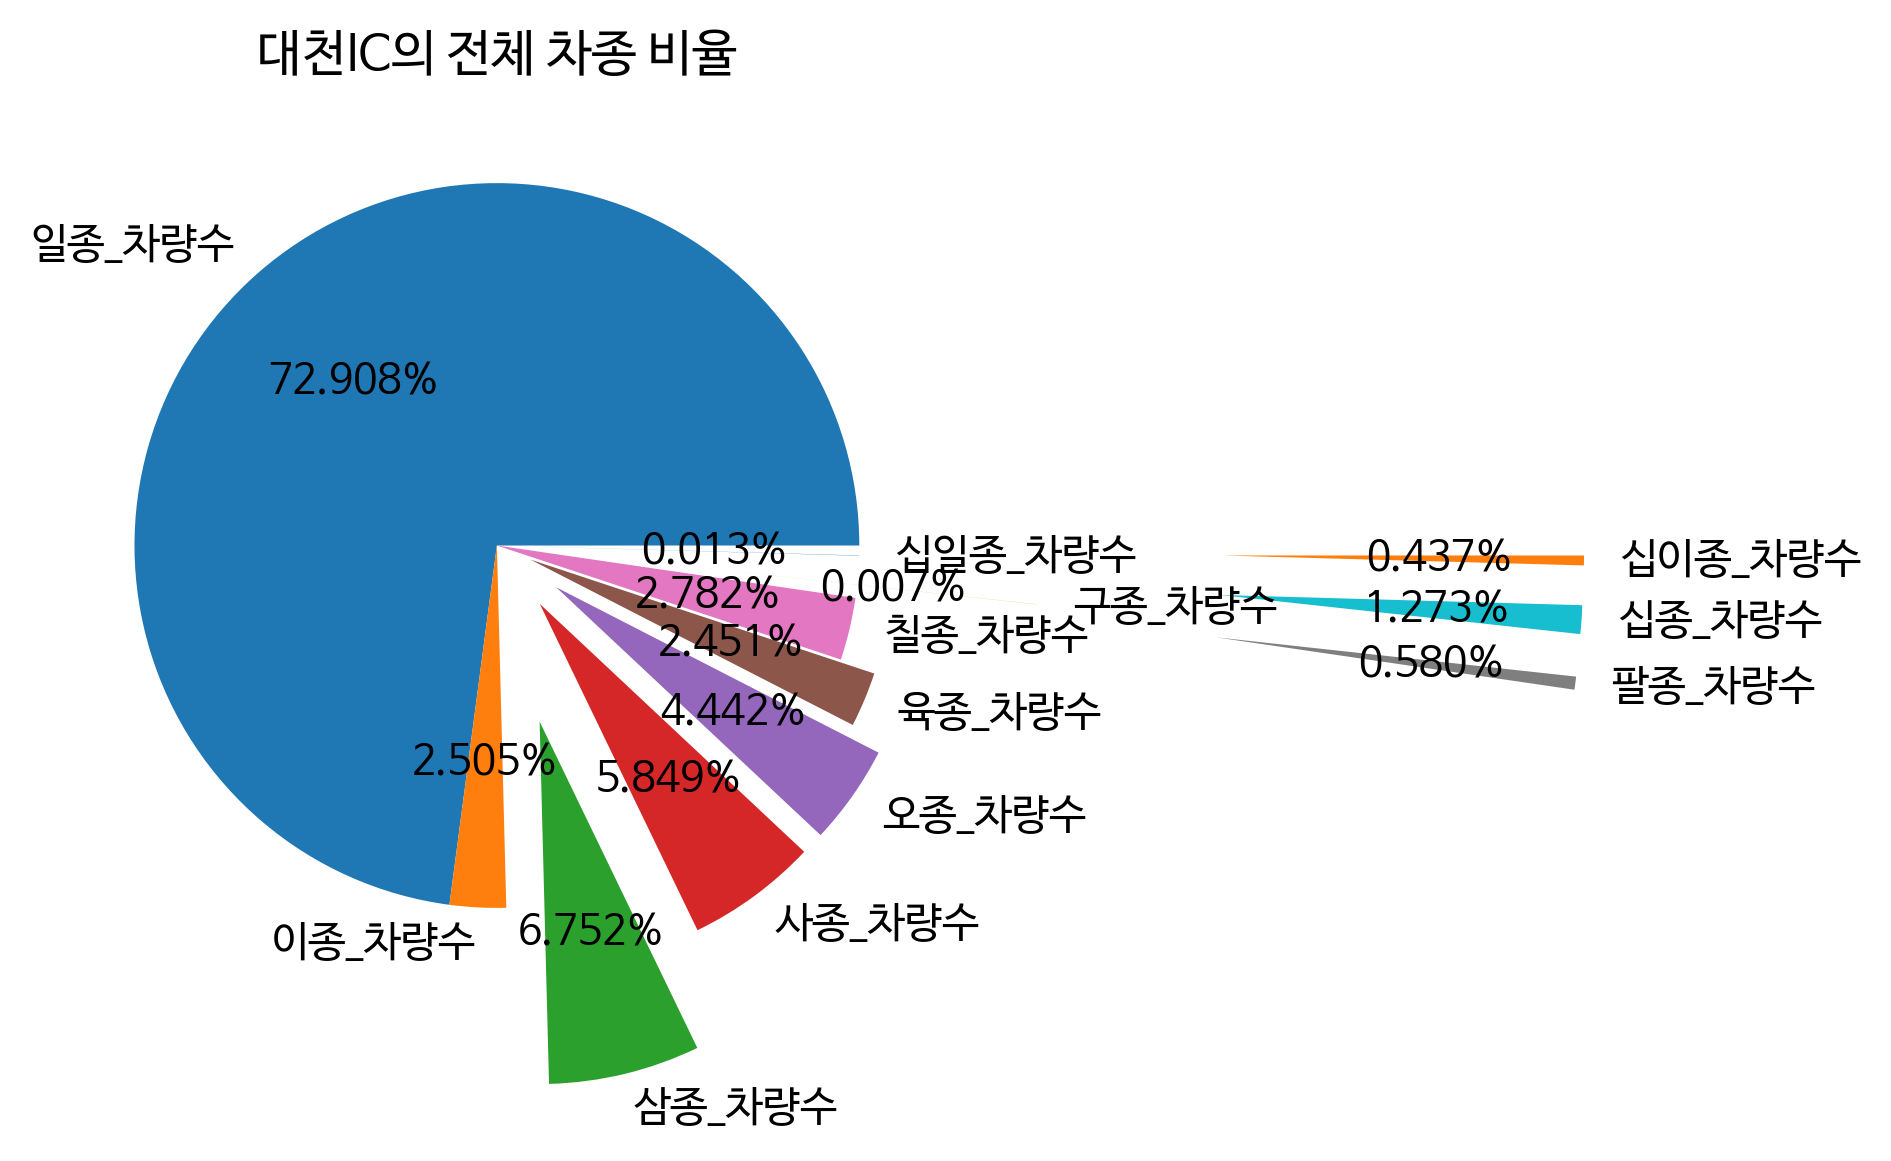

In [22]:
# 대천IC의 전체 차종 비율 pie 차트

import matplotlib.pyplot as plt

explode = [0, 0, 0.5, 0.2, 0.2, 0.1, 0, 2, 0.5, 2, 0, 2]

plt.figure(dpi=150)
plt.title('대천IC의 전체 차종 비율')
plt.pie(daecheon_car_total, labels=df.columns[6:18], autopct='%.3f%%', explode=explode) # labels에 굳이 column들을 리스트 내포로 만들지 않아도 된다
plt.show()

In [23]:
df_D= df[df.도로_종료위치 == ' 대천IC']
df_D.head(7)

,도로_시작위치,도로_종료위치,년,월,일,방향,일종_차량수,이종_차량수,삼종_차량수,사종_차량수,오종_차량수,육종_차량수,칠종_차량수,팔종_차량수,구종_차량수,십종_차량수,십일종_차량수,십이종_차량수,전체_차량수
119266,무창포IC,대천IC,2016,1,1,1,7738,322,1111,813,752,361,311,100,0,142,1,64,11715
119267,무창포IC,대천IC,2016,1,2,1,7630,254,1333,948,686,439,322,125,3,198,2,31,11971
119268,무창포IC,대천IC,2016,1,3,2,12884,471,507,390,254,158,247,40,1,115,3,27,15097
119269,무창포IC,대천IC,2016,1,4,1,15479,630,800,576,411,293,202,95,2,132,3,23,18646
119270,무창포IC,대천IC,2016,1,5,1,9409,362,193,158,122,64,55,15,0,30,0,3,10411
119271,무창포IC,대천IC,2016,1,5,2,9902,195,222,179,101,83,71,22,0,43,0,13,10831
119272,무창포IC,대천IC,2016,1,7,2,6014,189,1268,852,603,313,499,93,1,203,2,67,10104


In [13]:
df_D.iloc[[1], [6,7,9]]


,일종_차량수,이종_차량수,사종_차량수
119267,7630,254,948


In [14]:
df_D.iloc[[4], [7,9,11,13,15,17]]

,이종_차량수,사종_차량수,육종_차량수,팔종_차량수,십종_차량수,십이종_차량수
119270,362,158,64,15,30,3


In [15]:
df_D.iloc[4, 7:18:2]

이종_차량수     362
사종_차량수     158
육종_차량수      64
팔종_차량수      15
십종_차량수      30
십이종_차량수      3
Name: 119270, dtype: object

In [16]:
df_D.iloc[1:2,[6,7,9]]

,일종_차량수,이종_차량수,사종_차량수
119267,7630,254,948


#119266 ~ 119270에서 전체_차량수가 가장 큰 행을 찾기

In [17]:
#119266 ~ 119270에서 전체_차량수가 가장 큰 행을 찾기
df1 = df_D.iloc[:5, [18]]
print(df1)

        전체_차량수
119266   11715
119267   11971
119268   15097
119269   18646
119270   10411


In [18]:
max(df1)

'전체_차량수'

In [19]:
max_df = df1[df1['전체_차량수'] == 18646]

print(max_df)



        전체_차량수
119269   18646


In [20]:
df_D[df_D.iloc[0:,18] == df_D.iloc[0:5,18].max()]
print(df1)

        전체_차량수
119266   11715
119267   11971
119268   15097
119269   18646
119270   10411


# 대천의 일종차량수, 이종차량수, 삼종차량수, ..., 십이종차량수의 각각 합계를 출력
힌트는 axis 사용

In [21]:
df_D.iloc[:, 6:19].sum(axis=0)


일종_차량수     4498756
이종_차량수      154581
삼종_차량수      416600
사종_차량수      360881
오종_차량수      274109
육종_차량수      151226
칠종_차량수      171680
팔종_차량수       35818
구종_차량수         442
십종_차량수       78579
십일종_차량수        778
십이종_차량수      26981
전체_차량수     6170431
dtype: int64